<a href="https://colab.research.google.com/github/piusAI/DeepLearning_Basic/blob/main/Chap04_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4.4 Gradient

##Gradient Vector X!

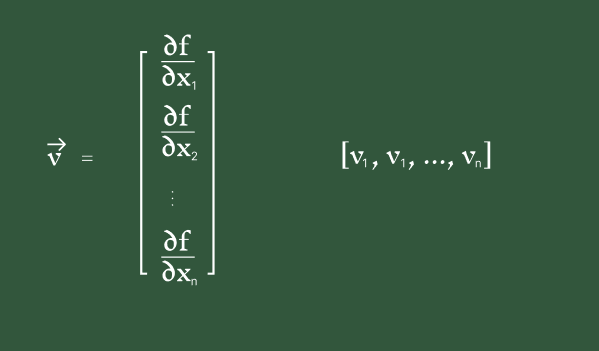

Vector's Array size = 1d

In [ ]:
# Center Differentiation

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_nobatch(f, x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]

    x[idx] = float(tmp_val) + h
    fxh1= f(x)
    x[idx] = tmp_val-h
    fxh2 = f(x)

    grad[idx] = (fxh1- fxh2) / (2*h)
    x[idx] = tmp_val

  return grad

Gradient ; 각축으로의 편미분(방향 미분, 순간변화율)을 vector로 묶어 쓴 것

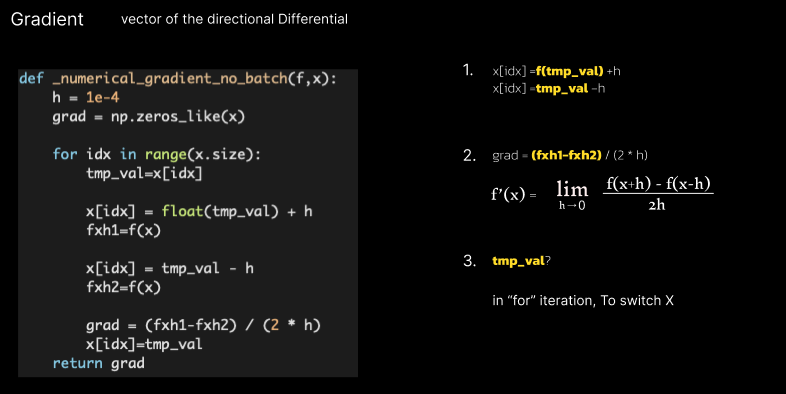

zeors_like(x)

=>형상 같은 배열 형성

idx : 0번째 ~ n-1번째까지 순회




##Gradient Array

In [ ]:
import numpy as np

def _numerical_gradient_no_batch(f,X):
  h = 1e-4
  grad = np.zeros_like(x)
  for idx in range(X.size):
    temp_val = x[idx]

    x[idx] = temp_val -h
    fxh1=f(x)

    x[idx] = temp_val +h
    fxh2=f(x)
    grad = (fxh1-fxh2)/ (2 * h)
    x[idx] =temp_val
  return grad
def numerical_gradient(f,X):
  if X.ndim ==1:
    return _numerical_gradient_no_batch(f,X)
  else :
    grad = np.zeors_like(X)
    for idx, x in enumerate(X):
      grad[idx] = _numerical_gradient_no_batch(f,x)
    return grad


In [ ]:
#enumerate? ? ? ?

X = ['Ronal', 'bale', 'neymar', 'Messi', "Dennis", "Bergkamp"]
for idx, x in enumerate(X):
  print(idx,x, "")
print("\n")

import numpy as np
Y = np.arange(20).reshape(4,-1)

for idx, y in enumerate(Y):
  print( idx, y)

print("\n")
for i in range(Y.shape[0]):
  print(i, Y[i])

0 Ronal 
1 bale 
2 neymar 
3 Messi 
4 Dennis 
5 Bergkamp 


0 [0 1 2 3 4]
1 [5 6 7 8 9]
2 [10 11 12 13 14]
3 [15 16 17 18 19]


0 [0 1 2 3 4]
1 [5 6 7 8 9]
2 [10 11 12 13 14]
3 [15 16 17 18 19]


In [ ]:
import numpy as np

X=np.arange(20).reshape(4,-1)
print(X)
print(np.sum(X,axis=0)) #Sum of Columns(↓)
print(np.sum(X,axis=1)) #Sum of Rows(→)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[30 34 38 42 46]
[10 35 60 85]


<ipython-input-4-496308faa776>:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


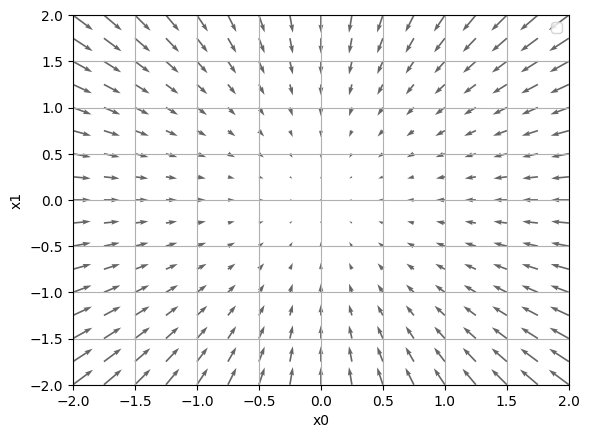

In [ ]:
#RE

import numpy as np
import matplotlib.pyplot as plt

def _numerical_gradient_no_batch(f,X):
  h = 1e-4
  grad = np.zeros_like(X)

  for i in range(X.size):
    tmp_val = X[i]

    X[i] = float(tmp_val) + h
    fxh1 = f(X)

    X[i] = tmp_val - h
    fxh2 = f(X)

    grad[i] = (fxh1-fxh2) / (2*h)
    X[i] = tmp_val

  return grad

def numerical_gradient(f,X):
  if X.ndim ==1:
    return _numerical_gradient_no_batch(f,X)
  else :
    grad = np.zeros_like(X)
    for idx, i in enumerate(X):
      grad[idx] = _numerical_gradient_no_batch(f,i)
    return grad

def tangent_line(f,x):
  d = numerical_gradient(f,x)
  print(d)
  C= -d * x + f(x)
  return lambda t : d*t +C

def function_2(x):
  if x.ndim ==1:
    return np.sum(x**2)
  else :
    return np.sum(x**2,axis=1)

if __name__ == '__main__':
  x0 = np.arange(-2,2.5,0.25)
  x1 = np.arange(-2,2.5,0.25)
  X,Y = np.meshgrid(x0,x1) #Grid 좌표계

  X = X.flatten()
  Y = Y.flatten() #2d mesh -> make 1 dimension for grid

  grad = numerical_gradient(function_2,np.array([X,Y]) )


  plt.figure()
  plt.quiver(X,Y,-grad[0],-grad[1],angles="xy",color="#666666")
  plt.xlim([-2,2])
  plt.ylim([-2,2])
  plt.xlabel('x0')
  plt.ylabel('x1')
  plt.grid()
  plt.legend()
  plt.draw()
  plt.show()


### 2D Mesh << 2D Array + 2D Array

##Graph Draw in matplotlib

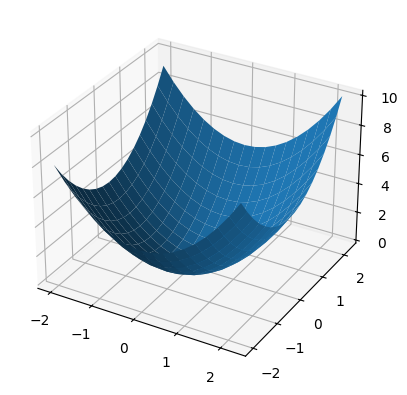

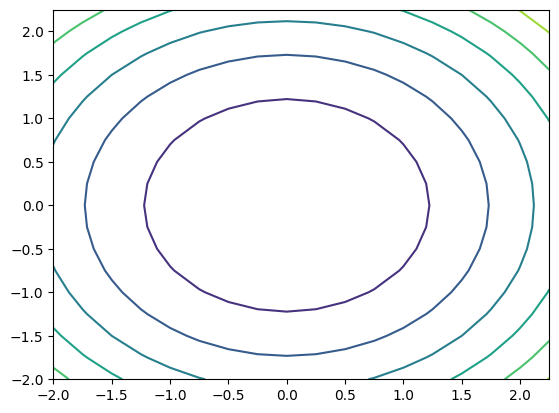

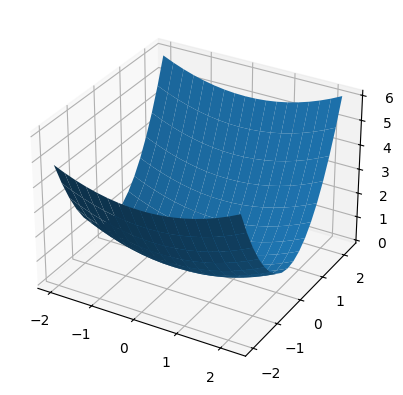

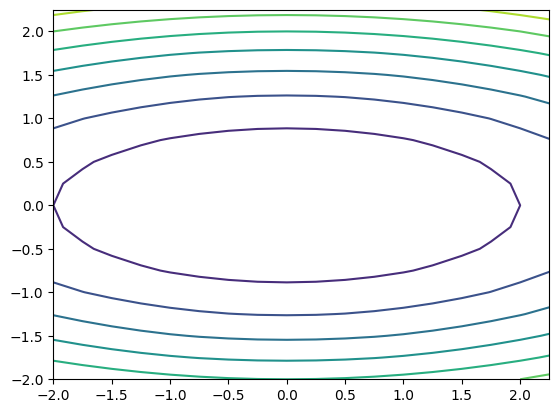

<ipython-input-23-9332a41fd861>:27: RuntimeWarning: invalid value encountered in sqrt
  Z=np.sqrt(9-X**2-Y**2)


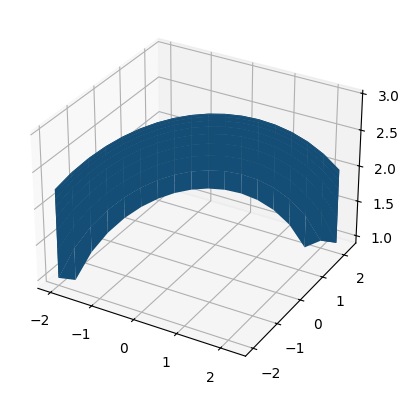

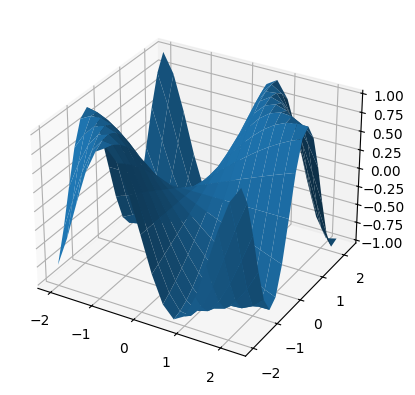

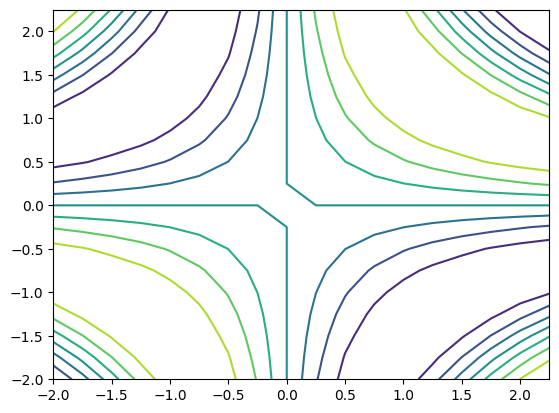

In [ ]:
##Self of the Gradient Descent

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #3Dimension in Matplotlib

x=np.arange(-2,2.5,0.25)
y=np.arange(-2,2.5,0.25)
X, Y =np.meshgrid(x,y)
Z= X**2+Y**2

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d') #Change New version
ax.plot_surface(X,Y,Z)
plt.show()
plt.contour(X,Y,Z) #contour draw
plt.show()

Z=(1/5)*X**2+Y**2
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z)
plt.show()
plt.contour(X,Y,Z)
plt.show()

Z=np.sqrt(9-X**2-Y**2)
fig = plt.figure()
ax= fig.add_subplot(111, projection='3d')
ax.plot_surface(X,y,Z)
plt.show()

Z=np.sin(X*Y)
fig = plt.figure()
ax= fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z)
plt.show()
plt.contour(X,Y,Z)
plt.show()

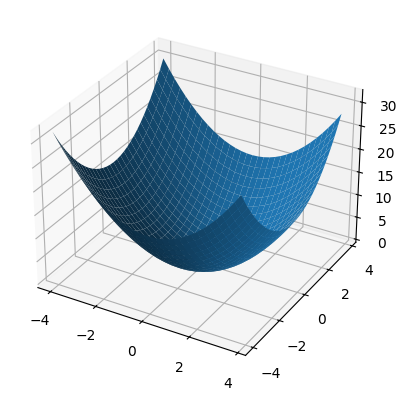

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# x=np.array([1,2,3])
x=np.arange(-4,4,0.25)
# y=np.array([4,5,6])
y=np.arange(-4,4,0.25)
X,Y = np.meshgrid(x,y)
Z=X**2 + Y**2

fig=plt.figure()
ax= fig.add_subplot(111,projection='3d') # New Method!

ax.plot_surface(X,Y,Z)
plt.show()

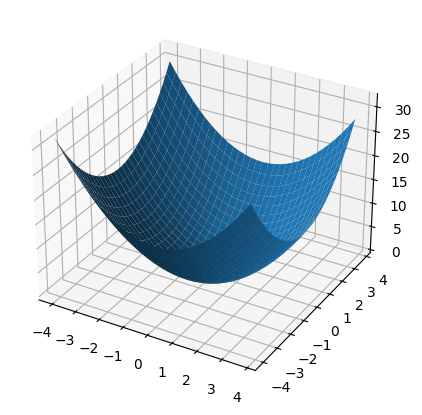

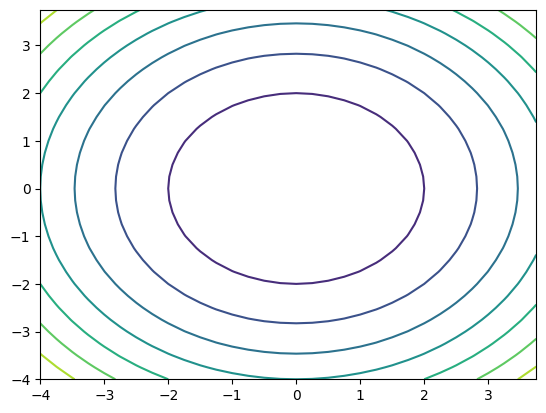

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-4,4,0.25)
Y = np.arange(-4,4,0.25)

X,Y = np.meshgrid(X,Y)

Z= X**2+Y**2

fig= plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z)
plt.show()

plt.contour(X,Y,Z)
plt.show()

##Gradient Arrow

<ipython-input-64-e3bf865d4eae>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


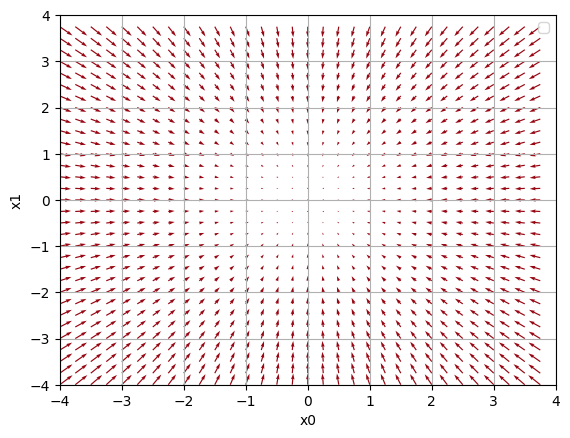

In [ ]:
if __name__ == '__main__':
  x0=np.arange(-4, 4, 0.25)
  x1=np.arange(-4,4,0.25)
  X, Y = np.meshgrid(x0,x1)
  X = X.flatten()
  Y = Y.flatten()

  grad = numerical_gradient(function_2, np.c_[X,Y])

  plt.figure()
  plt.quiver(X,Y, -grad[:,0],-grad[:,1], angles="xy", color = "#970612")
  plt.xlim([-4,4])
  plt.ylim([-4,4])
  plt.xlabel('x0')
  plt.ylabel('x1')

  plt.grid()
  plt.legend()
  plt.draw()
  plt.show()

np.c_를 활용하여 column으로 수정했고

-grad[:,0]으로써 gradient를 활용.


In [ ]:

X=np.arange(24).reshape(4,-1)
Y=np.arange(36).reshape(4,-1)

print("X: \n", X)

print("\n \n")
print("Column : 0 =>", X[:,0])
print("Rows : 1 =>", X[1,:])

X1=np.c_[X, Y]
print(X1)

X: 
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]

 

Column : 0 => [ 0  6 12 18]
Rows : 1 => [ 6  7  8  9 10 11]
[[ 0  1  2  3  4  5  0  1  2  3  4  5  6  7  8]
 [ 6  7  8  9 10 11  9 10 11 12 13 14 15 16 17]
 [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
 [18 19 20 21 22 23 27 28 29 30 31 32 33 34 35]]


np.c_로 병합,

[:,0], [1,:]으로 indexing / slicing!